<a href="https://colab.research.google.com/github/ThCong/Predict-Price---Linear-Regression/blob/main/Predict_Price_Mobile_by_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Reading and Understanding the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HK6/Python/GK/mobile_price_data.csv')
df.head()


,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [ ]:
df.shape

(459, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [ ]:
df.describe()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
count,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459,459
unique,363,139,165,2,36,48,18,3,18,7,7,49,15,18,1,34,70,81,55,62
top,"Vivo Z1Pro (Sonic Black, 64 GB)","₹11,999",Black,Dual Sim,16.51 cm (6.5 inch),2340 x 1080 pixels,Android Pie 9,Octa Core,2 GHz,64 GB,4 GB,13MP + 2MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4000 mAh,75.6 mm,156.7 mm,8.8 mm,191 g
freq,4,19,28,458,51,66,126,444,149,185,160,72,112,139,459,135,35,23,48,27


#**2. Data Cleaning and Preparation**

In [ ]:
df['mobile_name'].nunique()

363

In [ ]:
#get mobile brand name
df['mobile_name'] = df['mobile_name'].apply(lambda x : x.split(' ')[0])
df['mobile_name'] = df['mobile_name'].replace(['POCO','Redmi', 'Mi', 'MI3'],'Xiaomi',regex=True)
df['mobile_name'].unique()



array(['Realme', 'Xiaomi', 'Vivo', 'Samsung', 'Infinix', 'OPPO'],
      dtype=object)

In [ ]:
#convert to numeric
df['mobile_price'] = pd.to_numeric(df['mobile_price'].apply(lambda x : x[1:]).str.replace(',',''))
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme,8999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme,8999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme,9999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,Realme,9999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,Realme,11999,That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,OPPO,13490,Black,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,32 GB,3 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
455,OPPO,9490,Red,Dual Sim,14.48 cm (5.7 inch),1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,16 GB,2 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
456,OPPO,22990,Red,Dual Sim,15.82 cm (6.23 inch),2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2 GHz,64 GB,4 GB,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",Yes,3400 mAh,75.3 mm,156 mm,7.8 mm,158 g
457,OPPO,13990,Marble Green,Dual Sim,16.59 cm (6.53 inch),1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1 GHz,128 GB,4 GB,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4020 mAh,76.1 mm,162 mm,8.3 mm,188 g


In [ ]:
#get color by the last word
def GetColor(x):
  if x.rfind(' ') != -1:
      return x[x.rfind(' ')+1:]
  else: 
      return x
df['mobile_color']=  df['mobile_color'].apply(lambda x: GetColor(x))
df['mobile_color'].unique()

array(['White', 'Blue', 'Green', 'Sea', 'Red', 'Orange', 'Black', 'Ruby',
       'Sapphire', 'Purple', 'Brick', 'Concrete', 'Grey', 'Gold',
       'Silver', 'white', 'gold', 'Violet', 'Wave', 'Gray', 'Brown',
       'Cyan', 'Edition', 'Greener', 'Champagne', 'Mint', 'Mist'],
      dtype=object)

In [ ]:
#get display_size by inch unit
df['disp_size'] = pd.to_numeric(df['disp_size'].apply(lambda x : x[x.find('(')+1:x.find('i')]))
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme,8999,White,Dual Sim,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme,8999,Blue,Dual Sim,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme,9999,Blue,Dual Sim,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,Realme,9999,White,Dual Sim,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,Realme,11999,Green,Dual Sim,6.50,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,OPPO,13490,Black,Dual Sim,5.70,1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,32 GB,3 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
455,OPPO,9490,Red,Dual Sim,5.70,1440 x 720 Pixels,Android Nougat 7.1,Octa Core,2.5 GHz,16 GB,2 GB,13MP Rear Camera,8MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,3180 mAh,73.1 mm,150.5 mm,7.7 mm,143 g
456,OPPO,22990,Red,Dual Sim,6.23,2280 x 1080 Pixels,Android Oreo 8.1.0,Octa Core,2 GHz,64 GB,4 GB,16MP Rear Camera,25MP Front Camera,"3G, 4G, 2G",Yes,3400 mAh,75.3 mm,156 mm,7.8 mm,158 g
457,OPPO,13990,Green,Dual Sim,6.53,1080 x 2340 pixels,Android Pie 9.0,Octa Core,2.1 GHz,128 GB,4 GB,48MP + 5MP,16MP Front Camera,"3G, 4G VOLTE, 4G, 2G",Yes,4020 mAh,76.1 mm,162 mm,8.3 mm,188 g


In [ ]:
#resolution
df['resolution'] = df['resolution'].replace('[pP]ixel.*','',regex=True).replace('\$','',regex=True).replace('[×*]',' x ',regex=True)
df['resolution'].unique()
df['x_resolution'] = pd.to_numeric(df['resolution'].apply(lambda x: x[:x.find(' ')]))
df['y_resolution'] = pd.to_numeric(df['resolution'].apply(lambda x: x[x.find('x')+1:]))

In [ ]:
df[['resolution','x_resolution','y_resolution']]

,resolution,x_resolution,y_resolution
0,1600 x 720,1600,720
1,1600 x 720,1600,720
2,1600 x 720,1600,720
3,1600 x 720,1600,720
4,1600 x 720,1600,720
...,...,...,...
454,1440 x 720,1440,720
455,1440 x 720,1440,720
456,2280 x 1080,2280,1080
457,1080 x 2340,1080,2340


In [ ]:
#os version
df['os'] = df['os'].apply(lambda x : x.split('.')[0]) 
df['os'] = df['os'].replace('Android Pie 10', 'Android 10')


In [ ]:
df['os'].unique()

array(['Android 10', 'Android Pie 9', 'Android Oreo 8',
       'Android Nougat 7', 'Android KitKat 4', 'Android Marshmallow 6',
       'Android Lollipop 5'], dtype=object)

In [ ]:
#num_core 
df['num_cores'] = df['num_cores'].replace('single Core','Single Core')

In [ ]:
#convert these col to numeric type
df['mp_speed'] = pd.to_numeric(df['mp_speed'].str.replace('[a-zA-Z]','',regex=True))
df['int_memory'] = pd.to_numeric(df['int_memory'].str.replace('[a-zA-Z]','',regex=True))
df['ram'] = pd.to_numeric(df['ram'].str.replace('[a-zA-Z]','',regex=True))
df['battery_power'] = pd.to_numeric(df['battery_power'].replace('[a-zA-Z]','',regex=True))
df['mob_width'] = pd.to_numeric(df['mob_width'].replace('[a-zA-Z]','',regex=True))
df['mob_height'] = pd.to_numeric(df['mob_height'].replace('[a-zA-Z]','',regex=True))
df['mob_depth'] = pd.to_numeric(df['mob_depth'].replace('[a-zA-Z]','',regex=True))
df['mob_weight'] = pd.to_numeric(df['mob_weight'].replace('[a-zA-Z]','',regex=True))


In [ ]:
#get max f_cam
df['f_cam'] = pd.to_numeric(df['f_cam'].apply(lambda x: x[:x.find('M')]))
#get max p_cam
df['p_cam'] = pd.to_numeric(df['p_cam'].apply(lambda x: x[:x.find('M')]))
df[['f_cam','p_cam']]

,f_cam,p_cam
0,5,12
1,5,12
2,5,12
3,5,12
4,16,48
...,...,...
454,8,13
455,8,13
456,25,16
457,16,48


In [ ]:
#get quantity of network
df['network'] = [len(x.split(',')) for x in df['network']]
df['network'].value_counts()

4    238
3    180
2     27
1     11
5      3
Name: network, dtype: int64

In [ ]:
df['bluetooth'].unique()
# #drop bluetooth value because it contain only one unique value.
df.drop(['bluetooth','resolution'],axis=1,inplace=True)

In [ ]:
for rownum, row in df.iterrows():
    ordered_dim = sorted([row['mob_depth'],row['mob_width'],row['mob_height']])
#     print(row['mob_depth'],row['mob_width'],row['mob_height'])
#     print(ordered_dim)
    df.at[rownum,'mob_depth'] = ordered_dim[0]
    df.at[rownum,'mob_width'] = ordered_dim[1]
    df.at[rownum,'mob_height'] = ordered_dim[2]

In [ ]:
#check duplicated
df.loc[df.duplicated()]

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,x_resolution,y_resolution
43,Realme,7499,Sapphire,Dual Sim,6.10,Android Pie 9,Octa Core,2.00,32,3,13,5,4,4000,73.70,154.30,8.50,166.0,1560,720
44,Realme,13999,Green,Dual Sim,6.30,Android Pie 9,Octa Core,2.30,64,4,48,16,3,4035,74.20,157.00,8.90,184.0,2340,1080
45,Realme,11999,Red,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,128,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
46,Realme,10999,Blue,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,64,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
47,Realme,11999,Purple,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,128,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
48,Realme,10999,Red,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,64,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
49,Realme,11999,Blue,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,128,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
50,Realme,10999,Purple,Dual Sim,6.50,Android Pie 9,Octa Core,2.00,64,4,48,13,4,5000,75.60,164.40,9.30,198.0,720,1600
51,Realme,29999,Blue,Dual Sim,6.50,Android Pie 9,Octa Core,2.96,64,6,64,16,4,4000,75.70,161.00,8.70,199.0,2400,1080
52,Realme,29999,White,Dual Sim,6.50,Android Pie 9,Octa Core,2.96,64,6,64,16,4,4000,75.70,161.00,8.70,199.0,2400,1080


In [ ]:
#remove duplicated 
df.drop_duplicates(keep=False, inplace=True)
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,x_resolution,y_resolution
0,Realme,8999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
1,Realme,8999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
2,Realme,9999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
3,Realme,9999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
4,Realme,11999,Green,Dual Sim,6.50,Android 10,Octa Core,2.0,128,4,48,16,4,5000,75.4,164.4,9.00,199.0,1600,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,OPPO,13990,Red,Dual Sim,5.70,Android Nougat 7,Octa Core,2.5,64,4,13,8,3,3180,73.1,150.5,7.70,143.0,1440,720
441,OPPO,17000,Purple,Dual Sim,6.30,Android Oreo 8,Octa Core,2.0,64,4,16,16,4,3500,74.0,156.7,7.99,169.0,2340,1080
442,OPPO,15000,Purple,Dual Sim,6.20,Android Oreo 8,Octa Core,1.8,64,4,13,8,3,4230,75.6,156.2,8.20,168.0,1520,720
446,OPPO,41990,Black,Dual Sim,6.60,Android Pie 9,Octa Core,2.8,256,8,48,16,4,4065,77.2,162.0,9.30,215.0,2340,1080


In [ ]:
df.reset_index(drop=True,inplace=True)
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,x_resolution,y_resolution
0,Realme,8999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
1,Realme,8999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
2,Realme,9999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
3,Realme,9999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
4,Realme,11999,Green,Dual Sim,6.50,Android 10,Octa Core,2.0,128,4,48,16,4,5000,75.4,164.4,9.00,199.0,1600,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,OPPO,13990,Red,Dual Sim,5.70,Android Nougat 7,Octa Core,2.5,64,4,13,8,3,3180,73.1,150.5,7.70,143.0,1440,720
344,OPPO,17000,Purple,Dual Sim,6.30,Android Oreo 8,Octa Core,2.0,64,4,16,16,4,3500,74.0,156.7,7.99,169.0,2340,1080
345,OPPO,15000,Purple,Dual Sim,6.20,Android Oreo 8,Octa Core,1.8,64,4,13,8,3,4230,75.6,156.2,8.20,168.0,1520,720
346,OPPO,41990,Black,Dual Sim,6.60,Android Pie 9,Octa Core,2.8,256,8,48,16,4,4065,77.2,162.0,9.30,215.0,2340,1080


#**3. Visualizing the data**



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


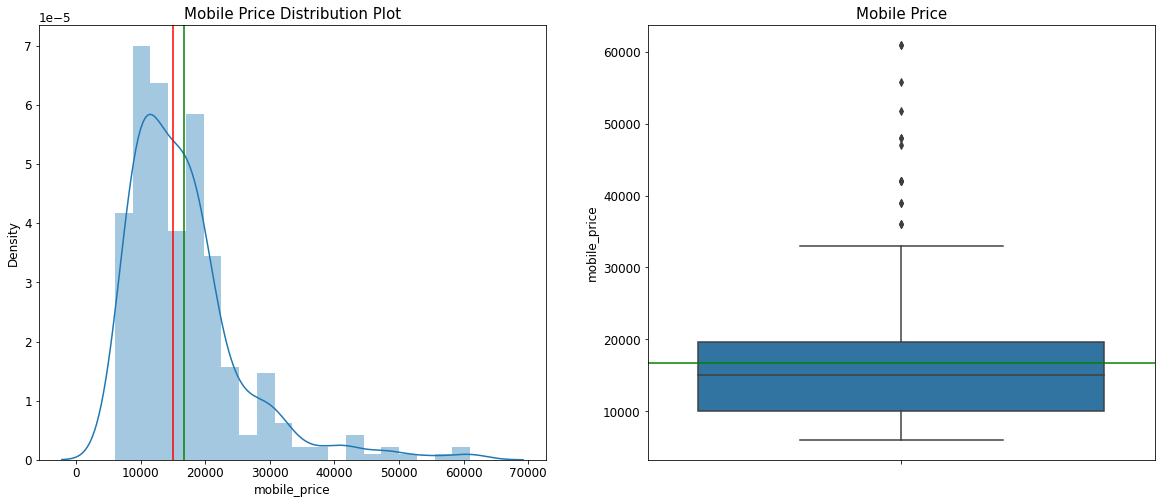

In [ ]:
#analyse dependent variable 
plt.figure(figsize=(20,8))

ax1=plt.subplot(1,2,1)
ax1 = plt.title('Mobile Price Distribution Plot',fontsize='15')
ax1 = sns.distplot(df.mobile_price)
ax1.axvline(df.mobile_price.median(), color='r')
ax1.axvline(df.mobile_price.mean(), color='g')



ax2 = plt.subplot(1,2,2)
ax2 = plt.title('Mobile Price',fontsize='15')
ax2 = sns.boxplot(y=df.mobile_price)
ax2.axhline(df.mobile_price.mean(), color='g')

plt.show()

In [ ]:
print(df.mobile_price.describe(percentiles = [0.25,0.50,0.75,1]))


count      348.000000
mean     16693.327586
std       8807.279761
min       6000.000000
25%       9999.000000
50%      14990.000000
75%      19675.000000
100%     60990.000000
max      60990.000000
Name: mobile_price, dtype: float64


Because the median is less than the mean, this plot is right-skewed.

Kurtosis nhọn. 

There is not a significant difference between the mean and the median of the price distribution. (mean = 16706 and median = 14994) which may lead to a low variance in prices.

Data points distribute uneven

25% data points are below 10000, 50% are below 14994, 75% are below 19459.

68% data point will fall in the range of 16706-8784 to 16706+8784 or between 7922 and 25490. 


##3.1 Visualize categorical data

- Name 
- Color 
- Sim 
- Num of cores
- os version

####name

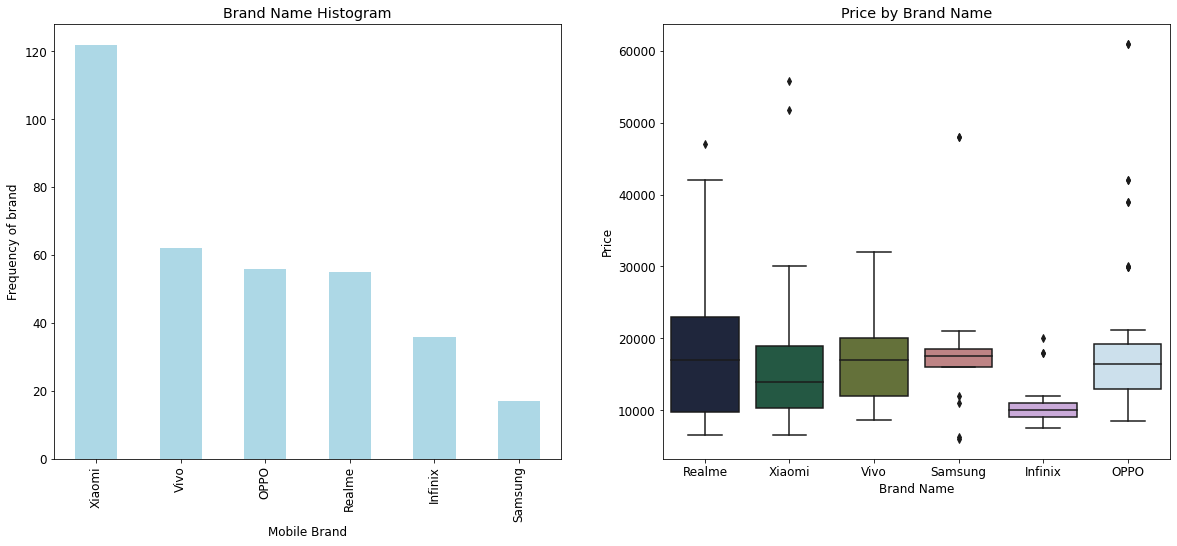

In [ ]:
#frequency of mobile brand and boxplot
plt.figure(figsize=(20, 8))


ax1 = plt.subplot(1,2,1)
ax1 = df.mobile_name.value_counts().plot(kind = 'bar',color='lightblue')
ax1.set_title('Brand Name Histogram')
ax1.set(xlabel = 'Mobile Brand', ylabel='Frequency of brand')

plt.subplot(1,2,2)
plt.title('Price by Brand Name')
sns.boxplot(x=df.mobile_name,y=df.mobile_price, palette=("cubehelix"))
plt.xlabel('Brand Name')
plt.ylabel('Price')

plt.rcParams['font.size'] = 13

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

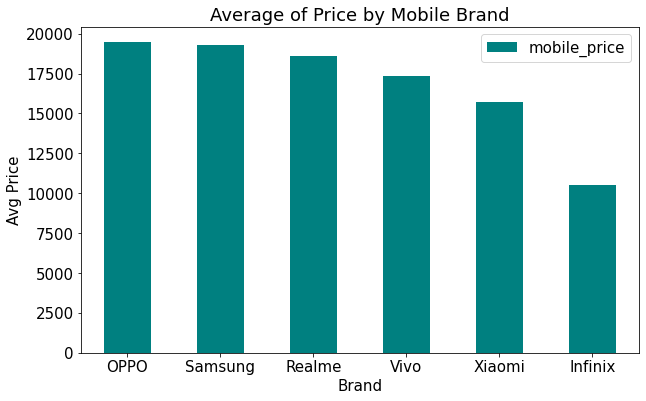

In [ ]:
#avg price group by mobile brand
plt.rcParams['font.size'] = 15
df_temp = pd.DataFrame(df.groupby(['mobile_name'])['mobile_price'].mean().sort_values(ascending = False))
df_temp.plot.bar(figsize=(10,6),color='teal')
plt.title('Average of Price by Mobile Brand')
plt.ylabel('Avg Price')
plt.xlabel('Brand')
plt.xticks(rotation=(0))


- Xiaomi is the favourest mobile brand, then Vivo and OPPO.
- Samsung is the least favour mobile brand. 



####color

[Text(0, 0.5, 'Frequency of color'), Text(0.5, 0, 'Color')]

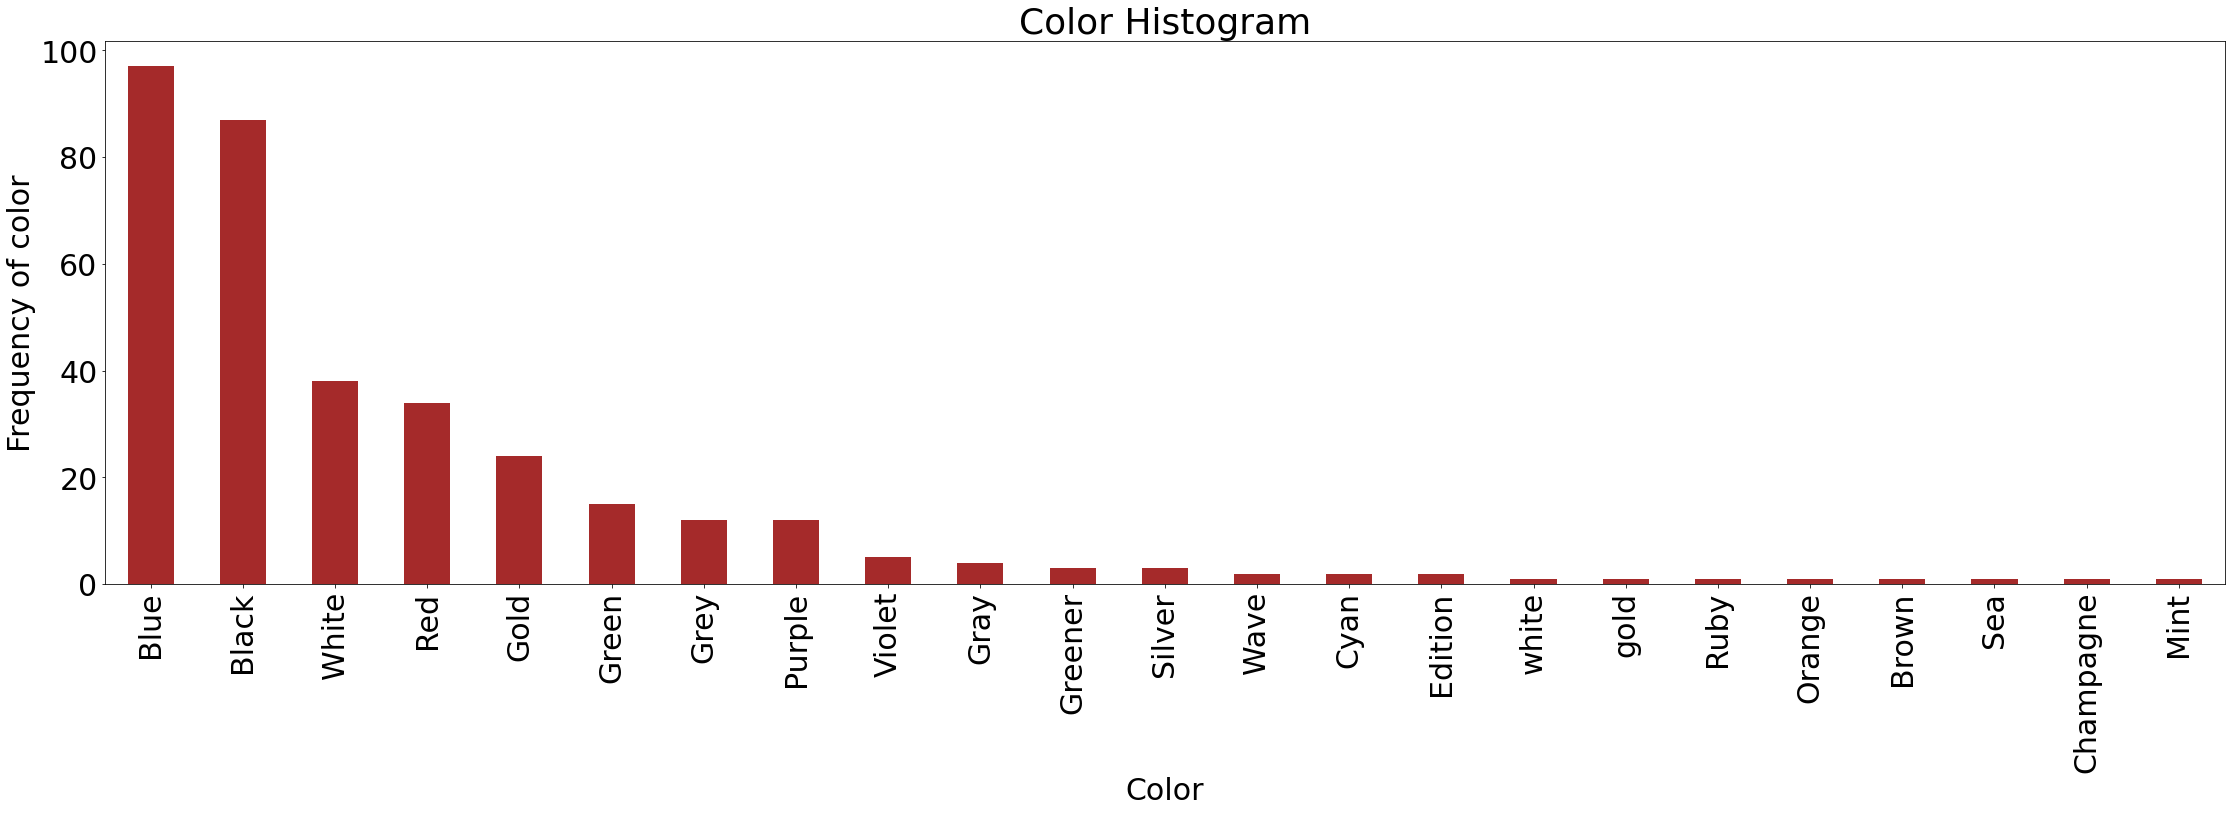

In [ ]:
#frequency of mobile color
plt.figure(figsize=(38, 10))
plt.rcParams['font.size'] = 30

ax1 = df.mobile_color.value_counts().plot(kind = 'bar',color='brown')
ax1.set_title('Color Histogram')
ax1.set(xlabel = 'Color', ylabel='Frequency of color')


- Blue and black dominate the list. It's not uncommon for rare colors to be unpopular such as mint, champagne, sea.

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 <a list of 8 Text major ticklabel objects>)

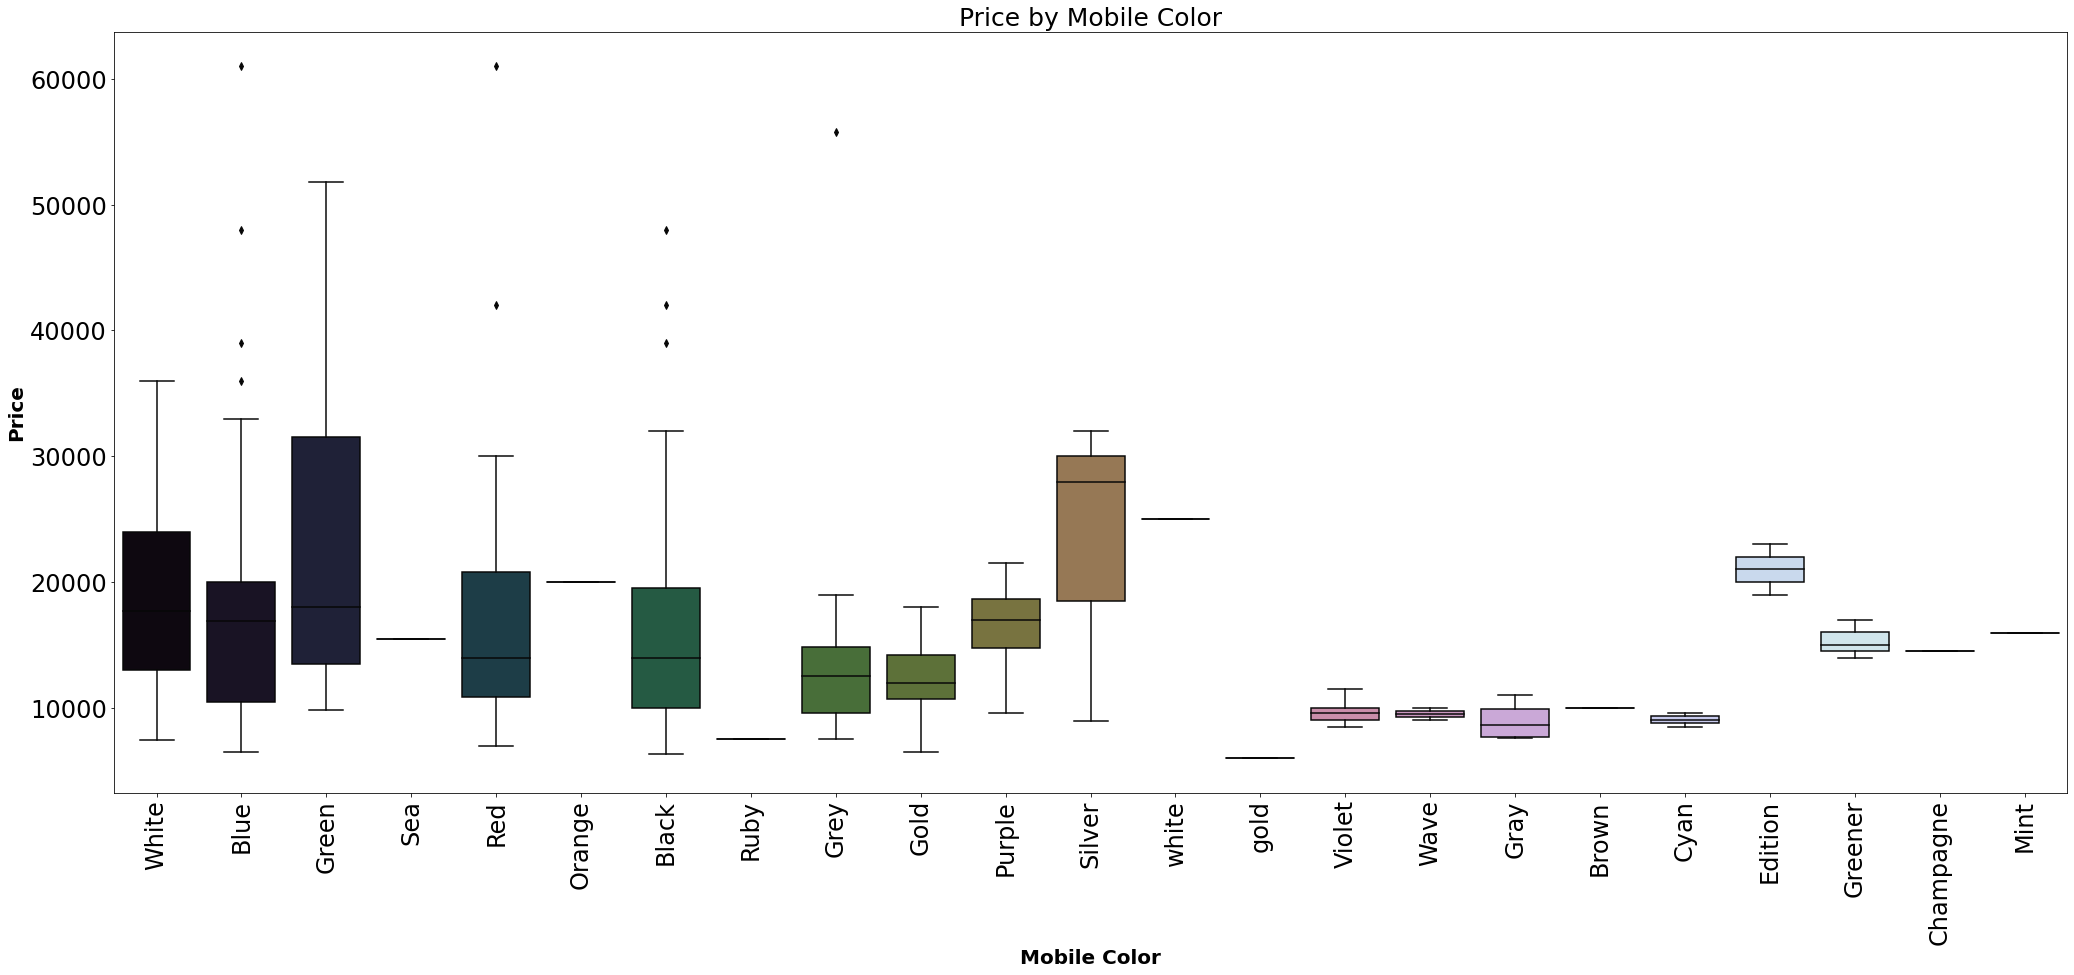

In [ ]:
#boxplot: mobile color
plt.figure(figsize=(35, 14))
plt.title('Price by Mobile Color',fontsize=25)
sns.boxplot(x=df.mobile_color,y=df.mobile_price, palette=("cubehelix"))
plt.xlabel('Mobile Color',fontweight='bold',fontsize=20)
plt.ylabel('Price',fontweight='bold',fontsize=20)
plt.xticks(fontsize=24, rotation = (90))
plt.yticks(fontsize=24)


(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text major ticklabel objects>)

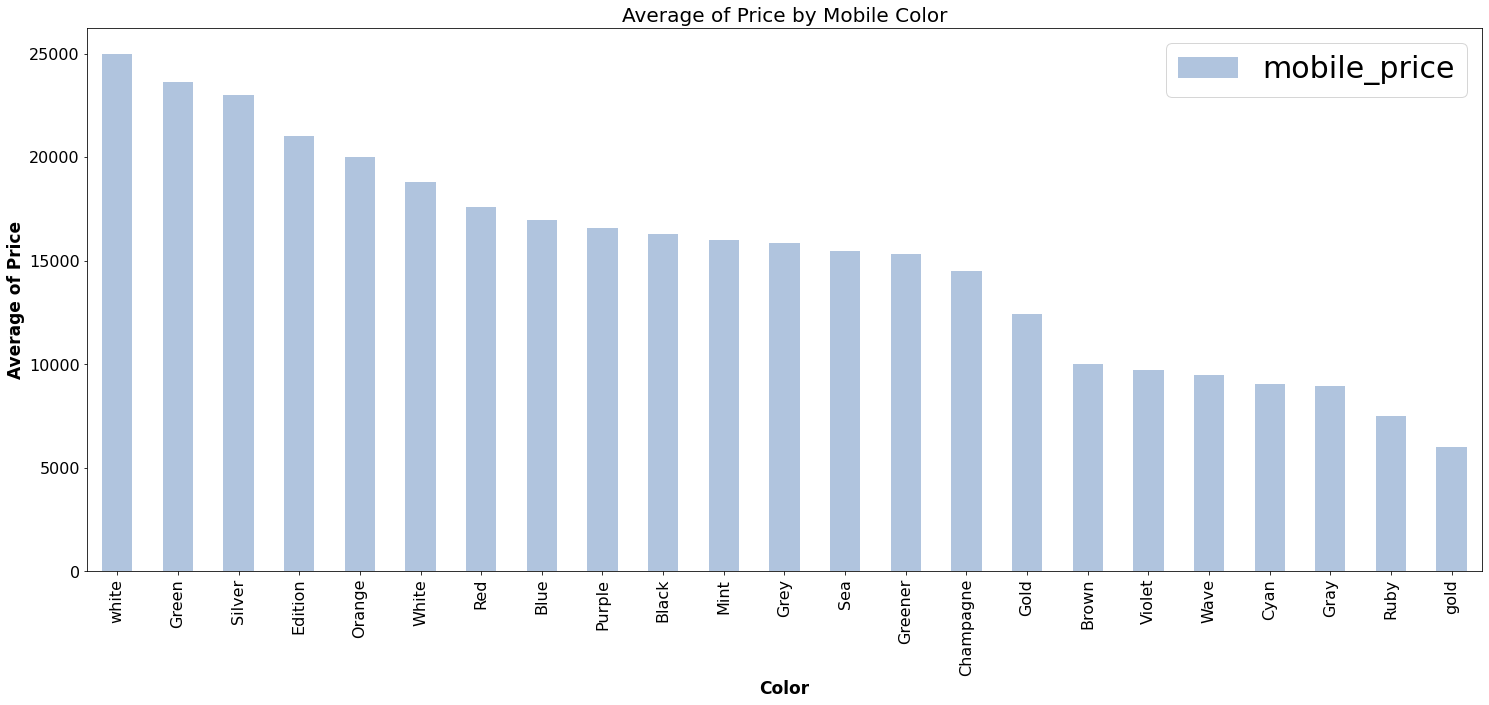

In [ ]:
#avg of price group by mobile color
df_temp = pd.DataFrame(df.groupby(['mobile_color'])['mobile_price'].mean().sort_values(ascending = False))
df_temp.plot.bar(figsize=(25,10),color='lightsteelblue')
plt.title('Average of Price by Mobile Color',fontsize=20)
plt.ylabel('Average of Price',fontweight='bold',fontsize=17)
plt.xlabel('Color',fontweight='bold',fontsize=17)
plt.xticks(fontsize=16, rotation = (90))
plt.yticks(fontsize=16)


####sim

Text(0, 0.5, 'Price')

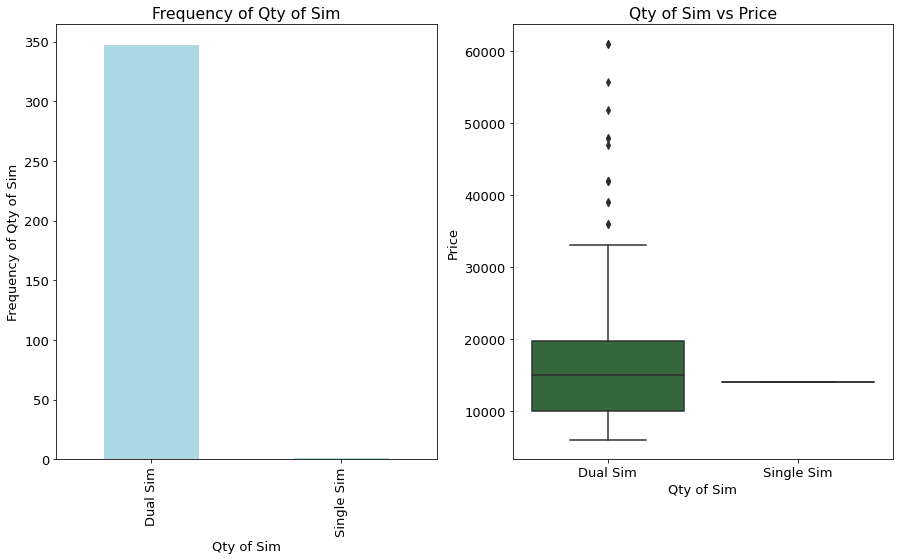

In [ ]:
#frequency of sim quantity and boxplot
plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 13
ax1 = plt.subplot(1,2,1)
ax1 = df.dual_sim.value_counts().plot(kind = 'bar',color='lightblue')
ax1.set_title('Frequency of Qty of Sim')
ax1.set(xlabel = 'Qty of Sim', ylabel='Frequency of Qty of Sim')
plt.subplot(1,2,2)
plt.title('Qty of Sim vs Price')
sns.boxplot(x=df.dual_sim,y=df.mobile_price, palette=("cubehelix"))
plt.xlabel('Qty of Sim')
plt.ylabel('Price')



Text(0, 0.5, 'Avg Price')

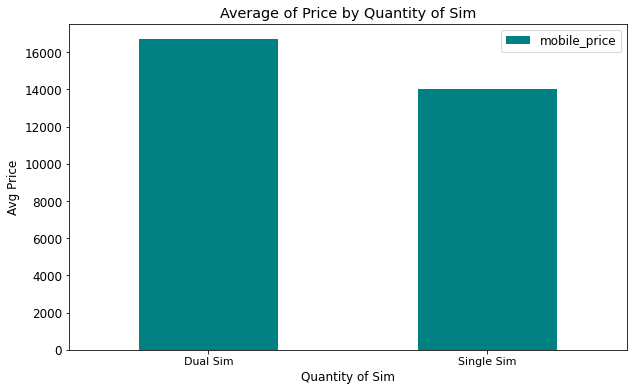

In [ ]:
#avg price group by sim quantity
plt.rcParams['font.size'] = 12
df_temp = pd.DataFrame(df.groupby(['dual_sim'])['mobile_price'].mean().sort_values(ascending = False))
df_temp.plot.bar(figsize=(10,6),color='teal')
plt.xticks(fontsize=11, rotation = (0))
plt.title('Average of Price by Quantity of Sim')
plt.xlabel('Quantity of Sim')
plt.ylabel('Avg Price')


####Num of cores

Text(0, 0.5, 'Price')

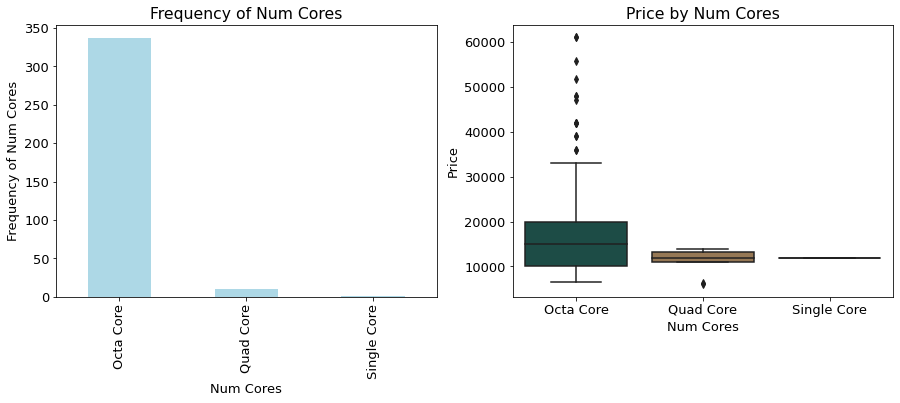

In [ ]:
#frequency of num of cores and boxplot
plt.figure(figsize=(15, 5))
plt.rcParams['font.size'] = 13
ax1 = plt.subplot(1,2,1)
ax1 = df.num_cores.value_counts().plot(kind = 'bar',color='lightblue')
ax1.set_title('Frequency of Num Cores')
ax1.set(xlabel = 'Num Cores', ylabel='Frequency of Num Cores')
plt.subplot(1,2,2)
plt.title('Price by Num Cores')
sns.boxplot(x=df.num_cores,y=df.mobile_price, palette=("cubehelix"))

plt.xlabel('Num Cores')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

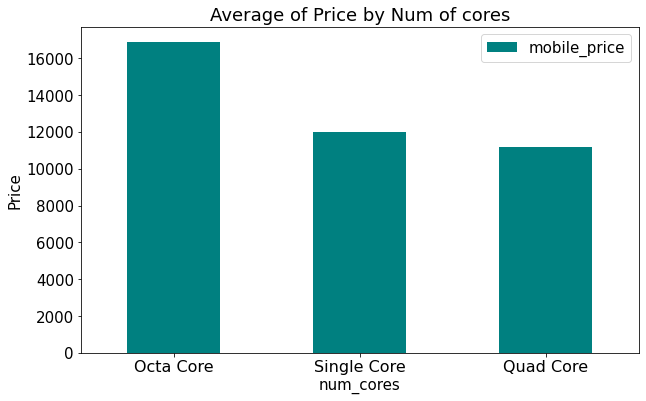

In [ ]:
#avg price group by num of cores
plt.rcParams['font.size'] = 15
df_temp = pd.DataFrame(df.groupby(['num_cores'])['mobile_price'].mean().sort_values(ascending = False))
df_temp.plot.bar(figsize=(10,6),color='teal')
plt.xticks(fontsize=16, rotation = (0))
plt.title('Average of Price by Num of cores')
plt.ylabel('Price')


#### Os version

Text(0, 0.5, 'Price')

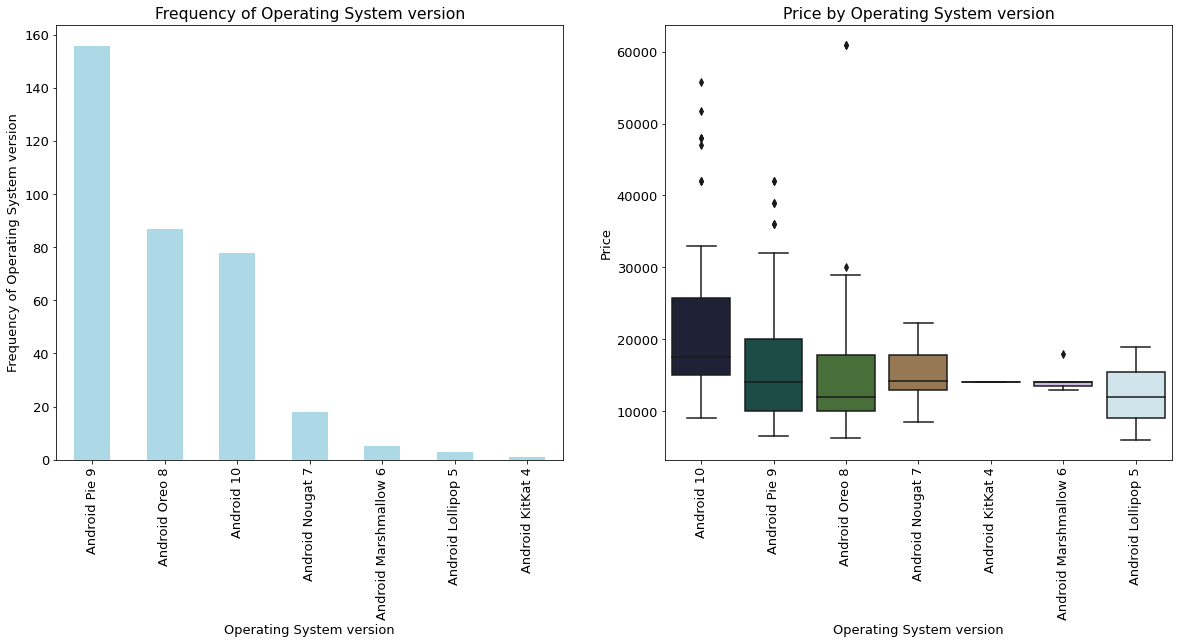

In [ ]:
#frequency of num of cores and boxplot
plt.figure(figsize=(20, 8))
plt.rcParams['font.size'] = 13
ax1 = plt.subplot(1,2,1)
ax1 = df.os.value_counts().plot(kind = 'bar',color='lightblue')
ax1.set_title('Frequency of Operating System version')
ax1.set(xlabel = 'Operating System version', ylabel='Frequency of Operating System version')
plt.subplot(1,2,2)
plt.title('Price by Operating System version')
plt.xticks(rotation=(90))
sns.boxplot(x=df.os,y=df.mobile_price, palette=("cubehelix"))

plt.xlabel('Operating System version')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

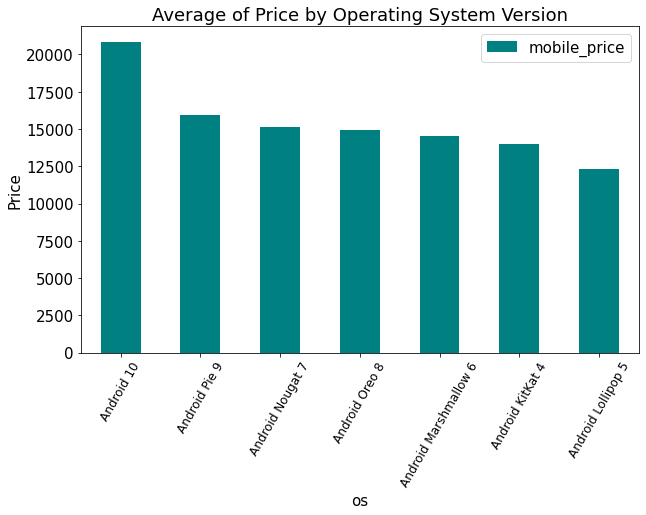

In [ ]:
#avg price group by os version
plt.rcParams['font.size'] = 15
df_temp = pd.DataFrame(df.groupby(['os'])['mobile_price'].mean().sort_values(ascending = False))
df_temp.plot.bar(figsize=(10,6),color='teal')
plt.xticks(fontsize=12, rotation = (60))
plt.title('Average of Price by Operating System Version')
plt.ylabel('Price')

##3.2 Visualize numerical data


In [ ]:
df

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,x_resolution,y_resolution
0,Realme,8999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
1,Realme,8999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,32,3,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
2,Realme,9999,Blue,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
3,Realme,9999,White,Dual Sim,6.52,Android 10,Octa Core,2.0,64,4,12,5,4,5000,75.0,164.4,8.95,195.0,1600,720
4,Realme,11999,Green,Dual Sim,6.50,Android 10,Octa Core,2.0,128,4,48,16,4,5000,75.4,164.4,9.00,199.0,1600,720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,OPPO,13990,Red,Dual Sim,5.70,Android Nougat 7,Octa Core,2.5,64,4,13,8,3,3180,73.1,150.5,7.70,143.0,1440,720
344,OPPO,17000,Purple,Dual Sim,6.30,Android Oreo 8,Octa Core,2.0,64,4,16,16,4,3500,74.0,156.7,7.99,169.0,2340,1080
345,OPPO,15000,Purple,Dual Sim,6.20,Android Oreo 8,Octa Core,1.8,64,4,13,8,3,4230,75.6,156.2,8.20,168.0,1520,720
346,OPPO,41990,Black,Dual Sim,6.60,Android Pie 9,Octa Core,2.8,256,8,48,16,4,4065,77.2,162.0,9.30,215.0,2340,1080


Text(0.5, 0, 'Front cam')

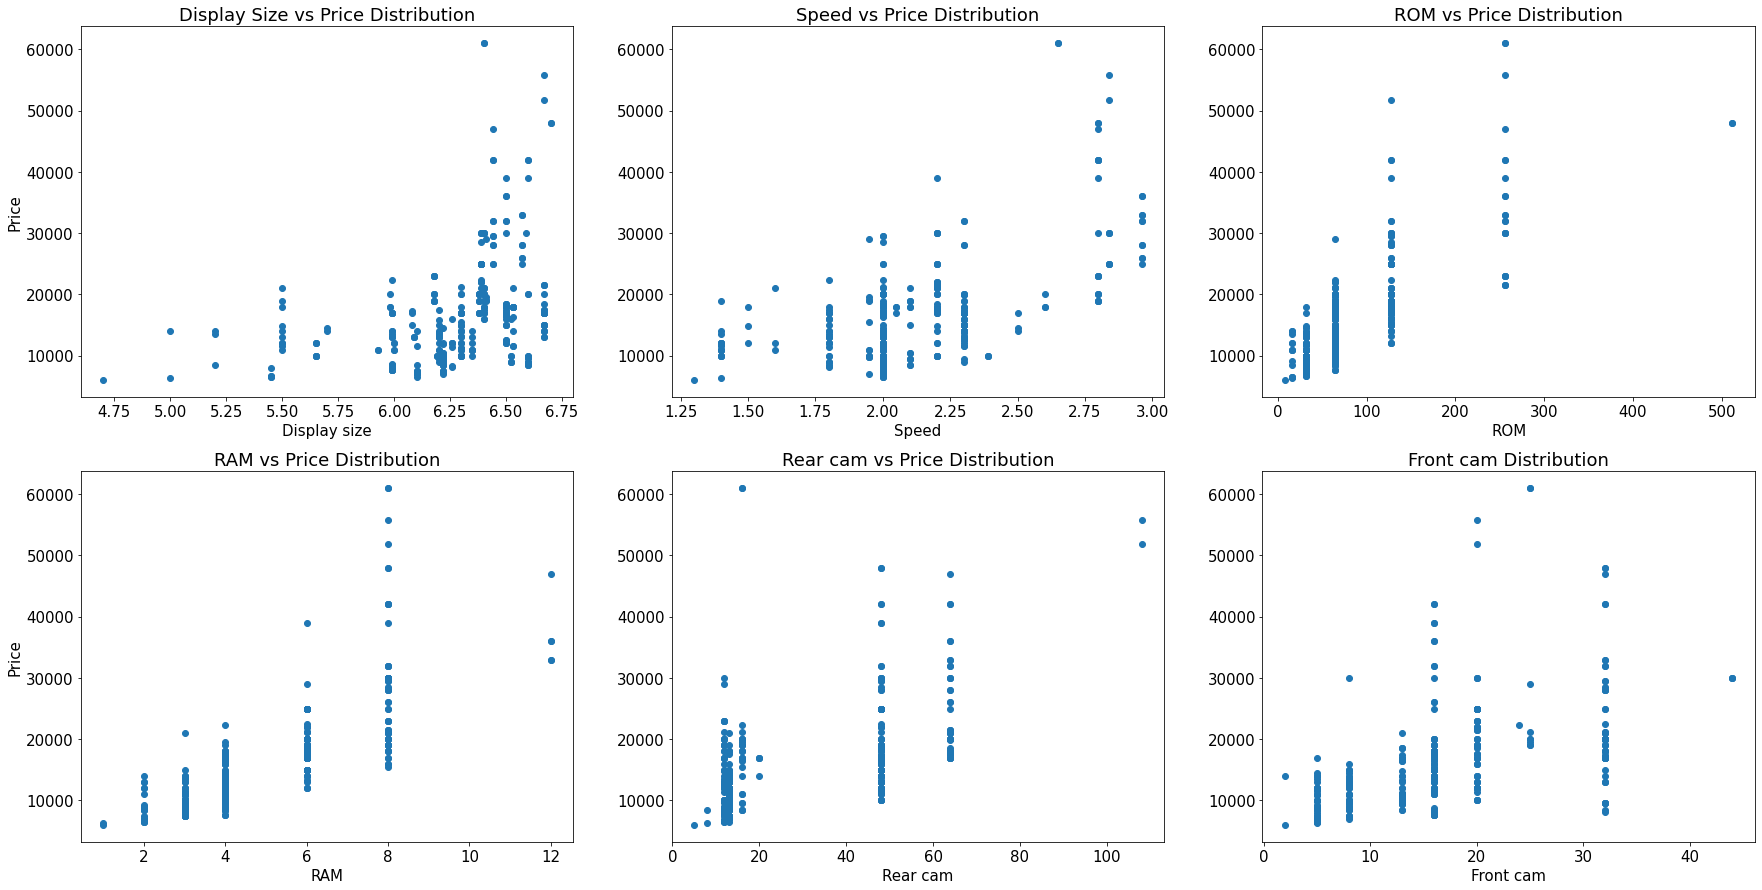

In [ ]:
#scatter plot

plt.figure(figsize=(30, 15))
    

plt.subplot(2,3,1)
plt.scatter(df['disp_size'],df['mobile_price'])
plt.title('Display Size vs Price Distribution')
plt.xlabel('Display size')
plt.ylabel('Price')


plt.subplot(2,3,2)
plt.scatter(df['mp_speed'],df['mobile_price'])
plt.title('Speed vs Price Distribution')
plt.xlabel('Speed')

plt.subplot(2,3,3)
plt.scatter(df['int_memory'],df['mobile_price'])
plt.title('ROM vs Price Distribution')
plt.xlabel('ROM')

plt.subplot(2,3,4)
plt.scatter(df['ram'],df['mobile_price'])
plt.title('RAM vs Price Distribution')
plt.xlabel('RAM')
plt.ylabel('Price')


plt.subplot(2,3,5)
plt.scatter(df['p_cam'],df['mobile_price'])
plt.title('Rear cam vs Price Distribution')
plt.xlabel('Rear cam')

plt.subplot(2,3,6)
plt.scatter(df['f_cam'],df['mobile_price'])
plt.title('Front cam Distribution')
plt.xlabel('Front cam')


Text(0.5, 0, 'Y Resolution')

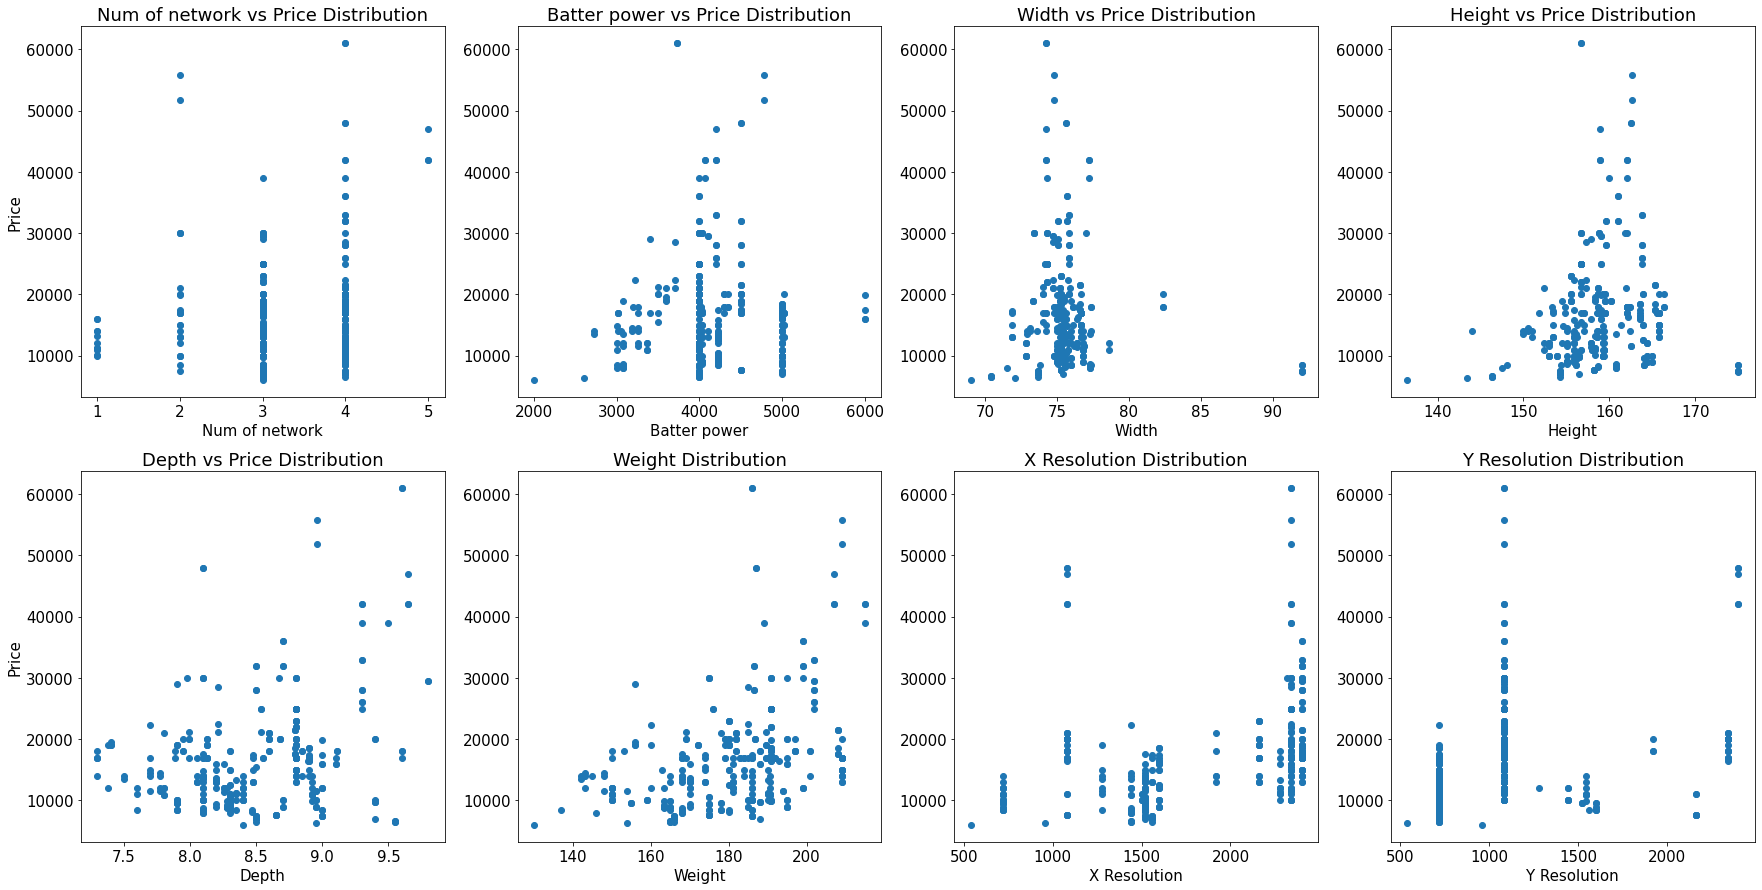

In [ ]:
plt.figure(figsize=(30, 15))
    

plt.subplot(2,4,1)
plt.scatter(df['network'],df['mobile_price'])
plt.title('Num of network vs Price Distribution')
plt.xlabel('Num of network')
plt.ylabel('Price')


plt.subplot(2,4,2)
plt.scatter(df['battery_power'],df['mobile_price'])
plt.title('Batter power vs Price Distribution')
plt.xlabel('Batter power')

plt.subplot(2,4,3)
plt.scatter(df['mob_width'],df['mobile_price'])
plt.title('Width vs Price Distribution')
plt.xlabel('Width')

plt.subplot(2,4,4)
plt.scatter(df['mob_height'],df['mobile_price'])
plt.title('Height vs Price Distribution')
plt.xlabel('Height')

plt.subplot(2,4,5)
plt.scatter(df['mob_depth'],df['mobile_price'])
plt.title('Depth vs Price Distribution')
plt.xlabel('Depth')
plt.ylabel('Price')

plt.subplot(2,4,6)
plt.scatter(df['mob_weight'],df['mobile_price'])
plt.title('Weight Distribution')
plt.xlabel('Weight')

plt.subplot(2,4,7)
plt.scatter(df['x_resolution'],df['mobile_price'])
plt.title('X Resolution Distribution')
plt.xlabel('X Resolution')

plt.subplot(2,4,8)
plt.scatter(df['y_resolution'],df['mobile_price'])
plt.title('Y Resolution Distribution')
plt.xlabel('Y Resolution')

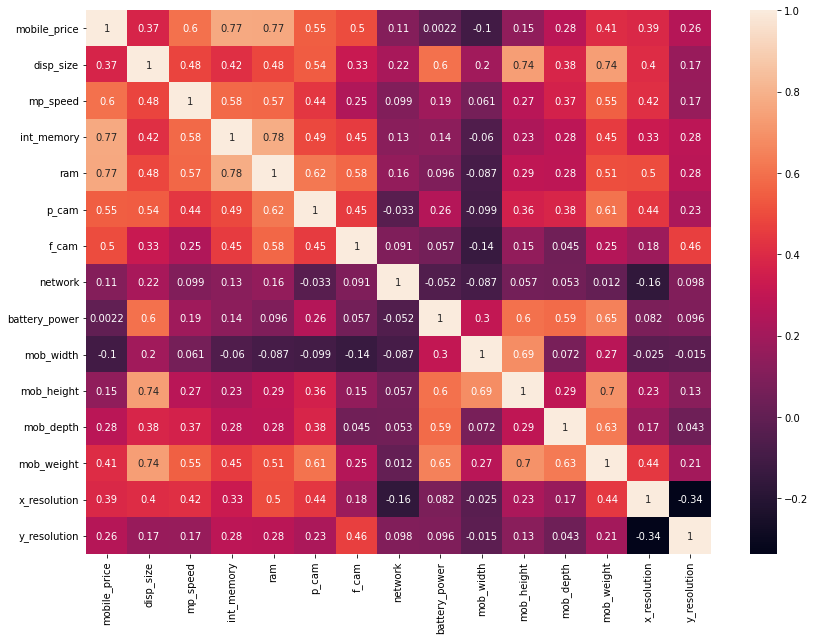

In [ ]:
# compare corr among numerical variable
# df.corr()
plt.figure(figsize=(14, 10))
plt.rcParams['font.size'] = 10

sns.heatmap(df.corr(),annot=True)



(-0.2, 1.0)

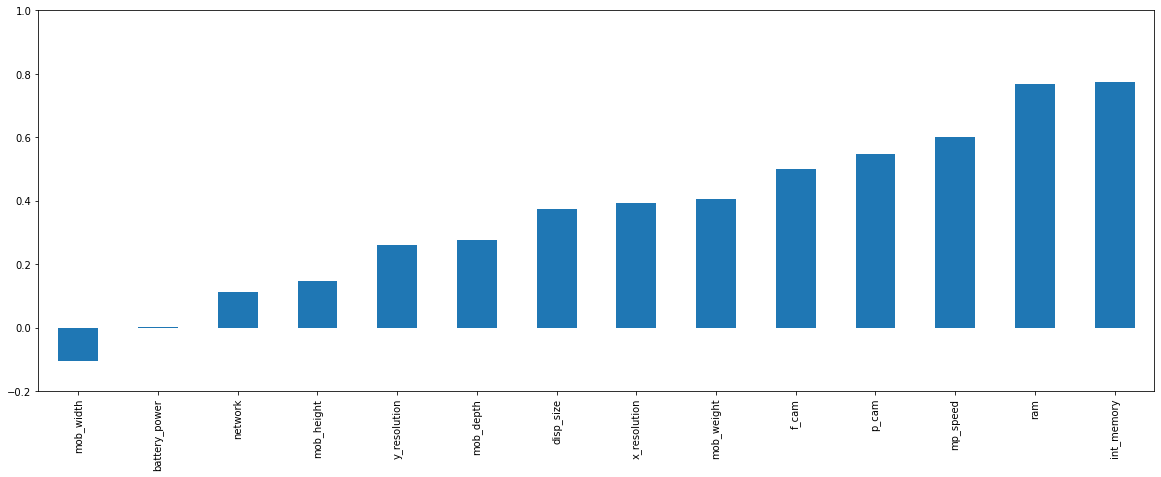

In [ ]:
plt.figure(figsize=(20, 7))

df1 = df.corr().sort_values('mobile_price')['mobile_price'][:-1]
ax1 = df1.plot(kind='bar')
ax1.set_ylim(-0.2,1)
# labels= [-0.00056,0.36,0.5,0.55,0.77]
# for index,data in enumerate(labels):
#     ax1.text(x=index-0.15 , y =data + 0.02 , s=f"{data}" , fontdict=dict(fontsize=15),color='brown')


In [ ]:
# sns.pairplot(df)
# plt.show()

##3.3 Convert categorical variable to numerical

---



In [ ]:
#convert to numerical by popularity
df['mobile_name'] = df['mobile_name'].replace('Samsung',8.5).replace('OPPO',8).replace('Xiaomi',7).replace('Vivo',6.5).replace('Realme',6.5).replace('Infinix',4)

In [ ]:
#convert to color levels
def convert_words_to_num(df,col):
    return df[col].astype('category').cat.codes

df['mobile_color'] = convert_words_to_num(df,'mobile_color')


In [ ]:
df['mobile_color'].unique()

array([20,  1,  8, 16, 14, 12,  0, 15, 10,  6, 13, 17, 22, 21, 18, 19,  7,
        2,  4,  5,  9,  3, 11], dtype=int8)

In [ ]:
#convert to quantity of sim
df['dual_sim'] = df['dual_sim'].replace('Dual Sim',2).replace('Single Sim',1)

In [ ]:
#convert to number of cores
df['num_cores'] = df['num_cores'].replace('Octa Core',8).replace('Quad Core',4).replace('Single Core',1)

In [ ]:
#convert to os version
df['os'] = pd.to_numeric(df['os'].str.replace('[a-zA-Z]','',regex=True))


In [ ]:
df[['dual_sim','num_cores','os']]

,dual_sim,num_cores,os
0,2,8,10
1,2,8,10
2,2,8,10
3,2,8,10
4,2,8,10
...,...,...,...
343,2,8,7
344,2,8,8
345,2,8,8
346,2,8,9


##3.3 Train-Test Split and feature scaling





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.linear_model import LinearRegression



In [ ]:
#split train data and test data with ratio 7:3
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)


In [ ]:
#scale train data by scaling standardization
scaler = StandardScaler()
vars = df.columns
df_train[vars] = scaler.fit_transform(df_train[vars])

In [ ]:
#check train data 
df_train

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,battery_power,mob_width,mob_height,mob_depth,mob_weight,x_resolution,y_resolution
305,1.064732,-0.842673,1.506096,0.064282,-0.155478,0.179792,0.159111,-0.951640,-0.847757,-1.474845,-0.849017,-1.389872,0.884652,0.030544,0.026521,-0.598176,-0.418089,-0.971304,-0.493346,-0.874908
175,-0.253077,0.896234,2.207478,0.064282,0.506612,0.179792,0.159111,-0.354315,0.524847,1.532601,0.799588,1.589203,-0.442326,0.475384,-0.556559,0.044794,0.047457,-0.323105,1.069574,-0.081121
59,0.186193,0.021238,1.926925,0.064282,-0.576809,0.179792,0.159111,-0.354315,0.524847,0.530119,0.799588,1.589203,0.884652,-0.298967,-1.573661,-1.098494,-0.078629,-0.452745,-0.422304,-0.874908
104,0.186193,-0.515650,-0.878604,0.064282,-0.035098,-0.836242,0.159111,-0.951640,-0.390222,0.530119,-0.896120,0.265170,0.884652,-0.348393,0.421086,-0.184690,-0.495680,-0.028469,0.856448,-0.081121
218,1.504002,0.081122,1.926925,0.064282,0.687182,1.195826,0.159111,-0.354315,-0.390222,-0.472363,0.799588,-0.507183,-0.442326,1.299162,-0.061160,0.993744,0.745775,0.560802,-0.351262,-0.874908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.186193,0.016891,-0.738327,0.064282,-0.847664,-0.836242,0.159111,0.243011,0.524847,0.530119,-0.519296,0.265170,0.884652,-1.979473,-0.017320,-0.019296,-2.357863,-0.794522,0.643323,-0.081121
343,1.064732,-0.299264,1.085266,0.064282,-1.720419,-1.852276,0.159111,1.138999,-0.390222,-0.472363,-0.849017,-1.058863,-0.442326,-1.699389,-1.025653,-1.714587,-1.581954,-2.267701,-0.635430,-0.874908
323,1.064732,-0.407946,1.085266,0.064282,-0.215668,-0.836242,0.159111,0.541673,-0.847757,-1.474845,-0.849017,-1.058863,0.884652,0.030544,-0.017320,-0.598176,-0.612067,-0.676668,-0.493346,-0.874908
280,0.186193,0.245122,-0.177222,0.064282,-0.275858,-0.836242,0.159111,2.034987,0.524847,0.530119,-0.896120,0.265170,-0.442326,-0.348393,-0.061160,-0.680873,0.551798,-0.087396,0.643323,-0.081121


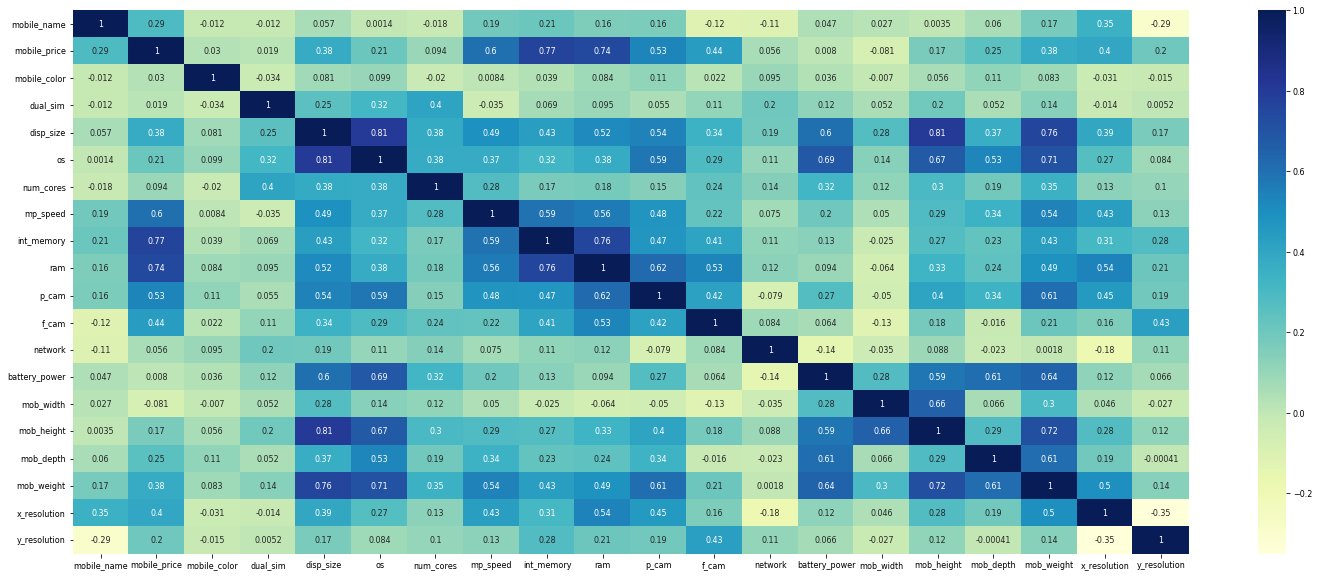

In [ ]:
#Check Correlation train data
plt
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 8
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")

# plt.subplot(1,2,2)
# df1 = df_train.sort_values('mobile_price')['mobile_price'][:-1]
# ax1 = df1.plot(kind='bar')
# ax1.set_ylim(-0.2,1)
# labels= [-0.00056,0.36,0.5,0.55,0.77]
# for index,data in enumerate(labels):
#     ax1.text(x=index-0.15 , y =data + 0.02 , s=f"{data}" , fontdict=dict(fontsize=15),color='brown')


(-0.2, 1.0)

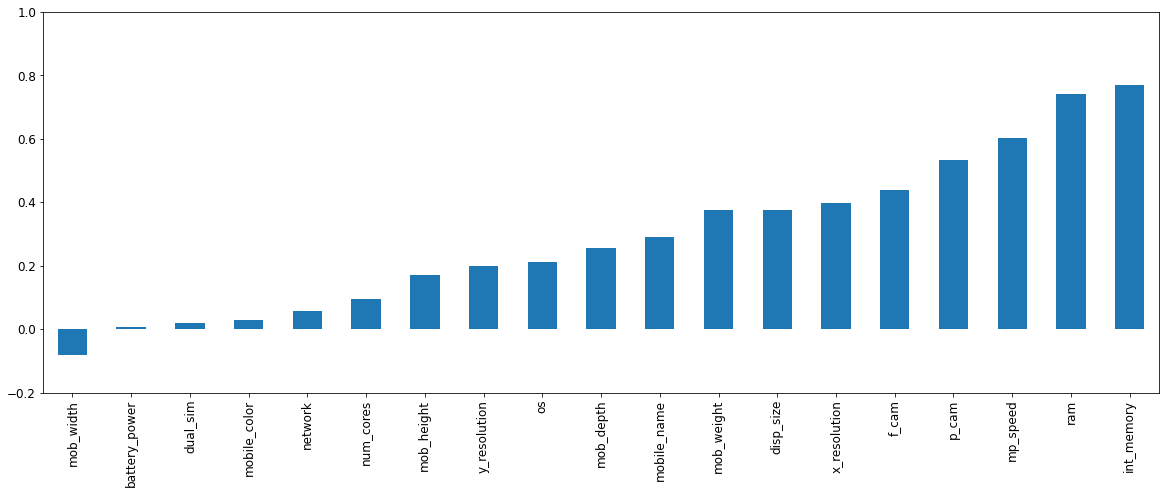

In [ ]:
#plot corr train data 
plt.figure(figsize=(20, 7))
plt.rcParams['font.size'] = 12

df1 = df_train.corr().sort_values('mobile_price')['mobile_price'][:-1]
ax1 = df1.plot(kind='bar')
ax1.set_ylim(-0.2,1)

In [ ]:
x_train = df_train.drop('mobile_price',axis=1)
y_train = df_train['mobile_price']

##3.5 Modeling

In [ ]:
#import sklearn lib
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#apply model
lm = LinearRegression()
lm.fit(x_train,y_train)
#rfe method to evaluate variables
rfe = RFE(lm)
rfe = rfe.fit(x_train, y_train)

In [ ]:
#get support variables
x_train_rfe = x_train[x_train.columns[rfe.support_]]


In [ ]:
x_train_rfe

,mobile_name,disp_size,os,int_memory,p_cam,f_cam,battery_power,mob_depth,mob_weight
305,1.064732,-0.155478,0.179792,-0.847757,-0.849017,-1.389872,0.030544,-0.418089,-0.971304
175,-0.253077,0.506612,0.179792,0.524847,0.799588,1.589203,0.475384,0.047457,-0.323105
59,0.186193,-0.576809,0.179792,0.524847,0.799588,1.589203,-0.298967,-0.078629,-0.452745
104,0.186193,-0.035098,-0.836242,-0.390222,-0.896120,0.265170,-0.348393,-0.495680,-0.028469
218,1.504002,0.687182,1.195826,-0.390222,0.799588,-0.507183,1.299162,0.745775,0.560802
...,...,...,...,...,...,...,...,...,...
79,0.186193,-0.847664,-0.836242,0.524847,-0.519296,0.265170,-1.979473,-2.357863,-0.794522
343,1.064732,-1.720419,-1.852276,-0.390222,-0.849017,-1.058863,-1.699389,-1.581954,-2.267701
323,1.064732,-0.215668,-0.836242,-0.847757,-0.849017,-1.058863,0.030544,-0.612067,-0.676668
280,0.186193,-0.275858,-0.836242,0.524847,-0.896120,0.265170,-0.348393,0.551798,-0.087396


In [ ]:
def build_model(x,y):
    x = sm.add_constant(x) #Adding the constant
    lm = sm.OLS(y,x).fit() # fitting the model
    print(lm.summary()) # model summary
    return x

#check model's vif
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)



**Model 1: Price = a + b*name + c*size + d*os + e*ROM + f*p_cam + g*f_cam + h*battery_power**



In [ ]:
x_train1 = x_train_rfe.drop(['mob_depth','mob_weight'],axis=1)
X_train_new1 = build_model(x_train1,y_train)

                            OLS Regression Results                            
Dep. Variable:           mobile_price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     76.54
Date:                Wed, 25 May 2022   Prob (F-statistic):           4.64e-57
Time:                        14:34:04   Log-Likelihood:                -200.49
No. Observations:                 243   AIC:                             417.0
Df Residuals:                     235   BIC:                             444.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.353e-17      0.036  -6.53e-16

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Model 2: Price = a + b*name + c*size + d*os + e*ROM + f*p_cam + g*f_cam + h*battery_power + i*depth**

In [ ]:
x_train2 = x_train_rfe.drop(['mob_weight'],axis=1)


In [ ]:
x_train_new2 = build_model(x_train2,y_train)

                            OLS Regression Results                            
Dep. Variable:           mobile_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     81.30
Date:                Wed, 25 May 2022   Prob (F-statistic):           3.10e-63
Time:                        14:34:04   Log-Likelihood:                -183.25
No. Observations:                 243   AIC:                             384.5
Df Residuals:                     234   BIC:                             415.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.353e-17      0.034     -7e-16

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Model 3: Price = a + b*name + c*size + d*os + e*ROM + f*p_cam + g*f_cam + h*battery_power + i*depth + j*weight**

In [ ]:
x_train3 = x_train_rfe
x_train_new3 = build_model(x_train3,y_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:           mobile_price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     73.47
Date:                Wed, 25 May 2022   Prob (F-statistic):           4.97e-63
Time:                        14:34:04   Log-Likelihood:                -181.40
No. Observations:                 243   AIC:                             382.8
Df Residuals:                     233   BIC:                             417.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.353e-17      0.033  -7.04e-16

In [ ]:
checkVIF(x_train_new3)

,Features,VIF
2,disp_size,4.57
3,os,4.44
9,mob_weight,4.23
7,battery_power,2.75
5,p_cam,2.30
8,mob_depth,2.22
4,int_memory,1.65
6,f_cam,1.53
1,mobile_name,1.18
0,const,1.00


In [ ]:
#caculate rmse model 2
lm = sm.OLS(y_train,x_train_new2).fit()
predictions2 = lm.predict(x_train_new2)
from sklearn.metrics import mean_squared_error
RMSE2 = np.sqrt(mean_squared_error(y_train, predictions2))
RMSE2

0.5143706220395365

In [ ]:
#caculate rmse model 3
lm = sm.OLS(y_train,x_train_new3).fit()
predictions3 = lm.predict(x_train_new3)
from sklearn.metrics import mean_squared_error
RMSE2 = np.sqrt(mean_squared_error(y_train, predictions3))
RMSE2

0.5104601285742959

In [ ]:
#đánh giá phần dư
lm = sm.OLS(y_train,x_train_new3).fit()
y_train_price = lm.predict(x_train_new3)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

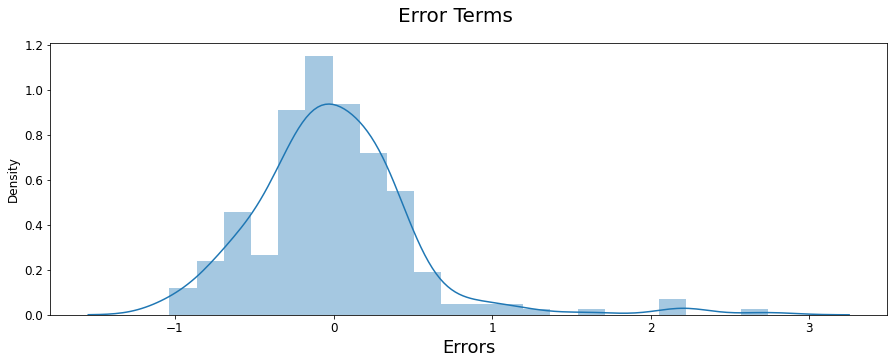

In [ ]:
# Plot the histogram of the error terms

fig = plt.figure(figsize=(15, 5))

sns.distplot((y_train - y_train_price))
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   


##**3.6 Prediction and Evaluation**

In [ ]:
#Scaling the test set
vars = df.columns
df_test[vars] = scaler.fit_transform(df_test[vars])
x_test = df_test.drop('mobile_price',axis=1)
y_test = df_test['mobile_price']


In [ ]:
# collect all column from xtrain3 except const.
x_train_new = x_train_new3.drop(['const'],axis=1)
# Creating X_test_new dataframe with x-train columns
x_test_new = x_test[x_train_new.columns]

# Adding a constant variable 
x_test_new = sm.add_constant(x_test_new)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_test_new

,const,mobile_name,disp_size,os,int_memory,p_cam,f_cam,battery_power,mob_depth,mob_weight
263,1.0,-2.606761,-0.957122,-1.709141,-0.370421,-0.841315,-0.014511,0.404542,-1.058248,1.012844
264,1.0,-2.606761,-0.957122,-1.709141,-0.370421,-0.841315,-0.014511,0.404542,-1.058248,1.012844
7,1.0,-0.175945,0.142717,0.330175,0.666758,0.961503,-0.014511,-0.171447,0.772329,0.219744
46,1.0,-0.175945,1.070706,1.349833,2.741117,1.762755,1.860792,0.130261,1.543099,1.317882
84,1.0,0.310218,-0.132243,0.330175,-0.370421,-0.841315,-0.952163,1.593089,1.735791,0.463775
...,...,...,...,...,...,...,...,...,...,...
284,1.0,0.310218,1.414406,1.349833,0.666758,0.961503,-0.014511,1.593089,0.579637,1.744936
269,1.0,0.310218,-0.269722,-0.689483,-0.370421,-0.841315,0.454315,-0.235446,0.579637,-0.024287
19,1.0,-0.175945,0.623897,1.349833,2.741117,1.762755,1.860792,0.130261,2.217522,1.622920
221,1.0,1.768708,-4.325378,-0.689483,-1.148306,-1.041628,-1.303783,-2.795395,0.868676,-1.610486


In [ ]:
#caculate y prediction
y_pred = lm.predict(x_test_new)


In [ ]:
#caculate r2_score
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7305363058480527

Text(0, 0.5, 'y_pred')

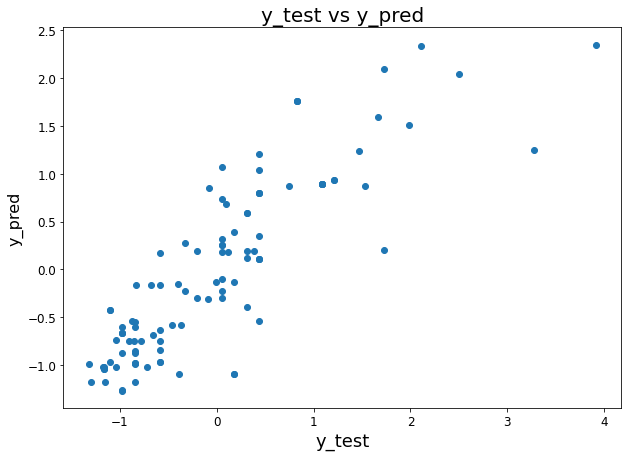

In [ ]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10, 7))
plt.scatter(y_test,y_pred)
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)  

In [ ]:
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           mobile_price   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     73.47
Date:                Wed, 25 May 2022   Prob (F-statistic):           4.97e-63
Time:                        14:40:57   Log-Likelihood:                -181.40
No. Observations:                 243   AIC:                             382.8
Df Residuals:                     233   BIC:                             417.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.353e-17      0.033  -7.04e-16      1.000      -0.066       0.066
mobile_name       0.1541      0.036      4.247      0.000       0.083       0.226
disp_size         0.3533      0.072      4.941      0.000       0.212       0.494
os               -0.3499      0.071     -4.963      0.000      -0.489      -0.211
int_memory        0.5297      0.043     12.318      0.000       0.445       0.614
p_cam             0.2379      0.051      4.693      0.000       0.138       0.338
f_cam             0.1649      0.041      3.981      0.000       0.083       0.247
battery_power    -0.2211      0.055     -3.986      0.000      -0.330      -0.112
mob_depth         0.3125      0.050      6.267      0.000       0.214       0.411
mob_weight       -0.1303      0.069     -1.893      0.060      -0.266       0.005
==============================================================================
Omnibus:                      102.818   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              522.698
Skew:                           1.629   Prob(JB):                    3.14e-114
Kurtosis:                       9.404   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""